In [ ]:
print("""
@File         : CH05.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-14 21:27:33
@Email        : cuixuanstephen@gmail.com
@Description  : 
""")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv("../05_visualizing_data/data/fb_stock_prices_2018.csv",
                 index_col="date", parse_dates=True)
quakes = pd.read_csv('../05_visualizing_data/data/earthquakes.csv')
covid = pd.read_csv('../05_visualizing_data/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x['dateRep'], format="%d/%m/%Y")
).set_index('date').replace("United_States_of_America", "USA").sort_index()['2020-01-18': "2020-09-18"]

<Axes: title={'center': 'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

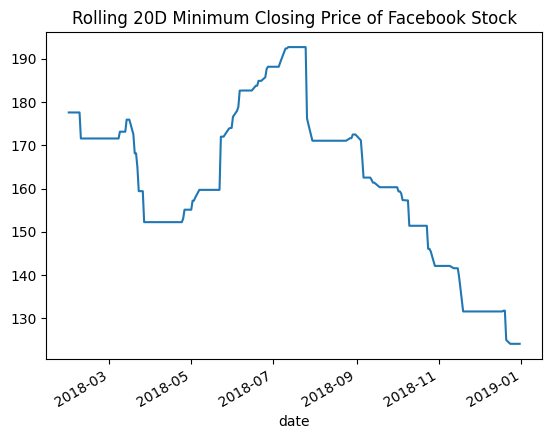

In [3]:
fb['close'].rolling(20).min().plot(
    title="Rolling 20D Minimum Closing Price of Facebook Stock"
)

<Axes: title={'center': "Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

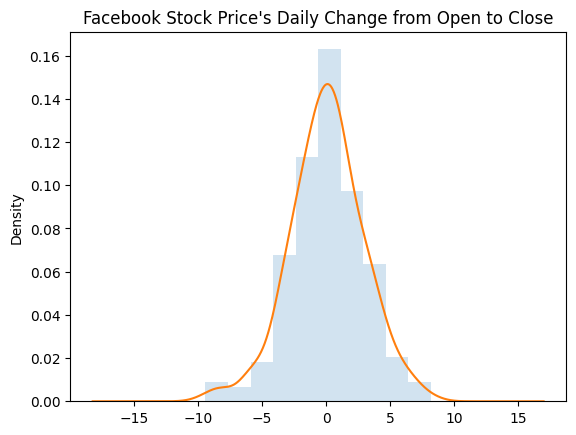

In [9]:
ax = (fb['close'] - fb['open']).plot(
    kind='hist', alpha=.2, density=True
)
(fb['close'] - fb['open']).plot(
    kind='kde', ax=ax,
    title="Facebook Stock Price\'s Daily Change from Open to Close"
)

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

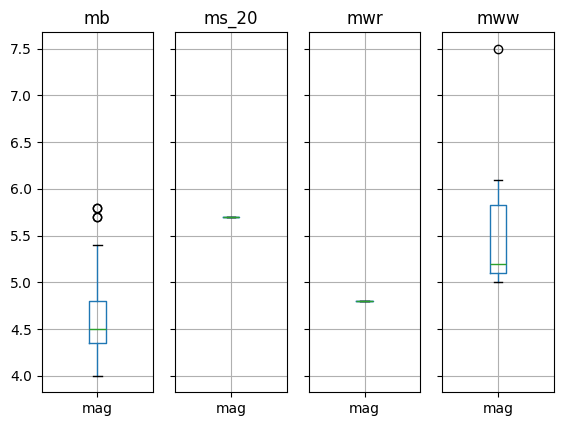

In [15]:
quakes.query(
    "parsed_place == 'Indonesia'"
)[['mag', 'magType']].groupby("magType").boxplot(layout=(1, 4))

<Axes: title={'center': 'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

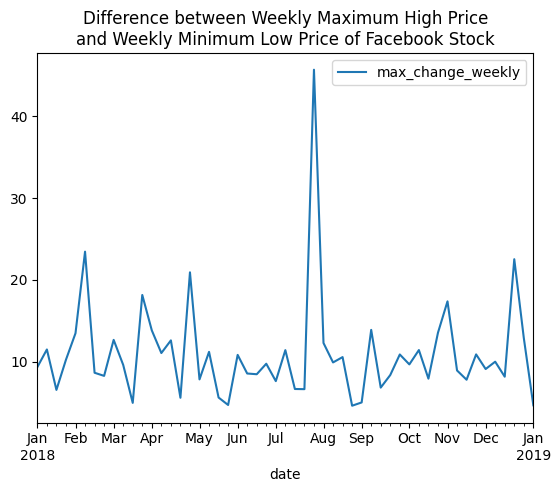

In [22]:
fb.resample("1W").agg(
    {"high":"max", "low": "min"}
).assign(
    max_change_weekly=lambda x: x['high'] - x['low']
).plot(
    y='max_change_weekly',
    title="Difference between Weekly Maximum High Price\n"
    "and Weekly Minimum Low Price of Facebook Stock"
)

<Axes: xlabel='date'>

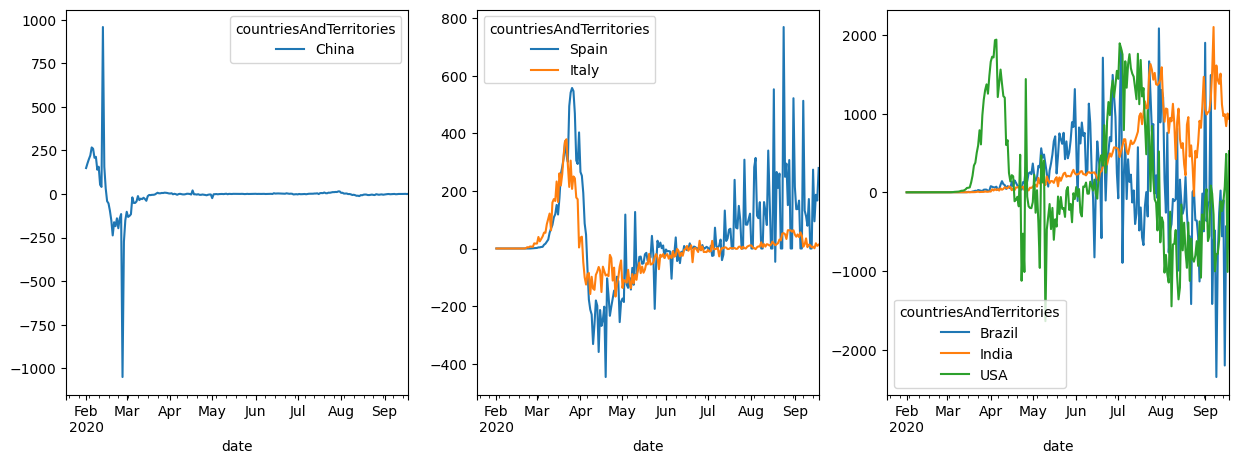

In [33]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns=['countriesAndTerritories'], values='cases', fill_value=0
).diff().rolling(14).mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
new_cases_rolling_average[['China']].plot(ax=axes[0])
new_cases_rolling_average[['Spain', "Italy"]].plot(ax=axes[1])
new_cases_rolling_average[['Brazil', "India", "USA"]].plot(ax=axes[2])

In [34]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


<Axes: title={'center': 'After Hours trading monthly effect'}, xlabel='date'>

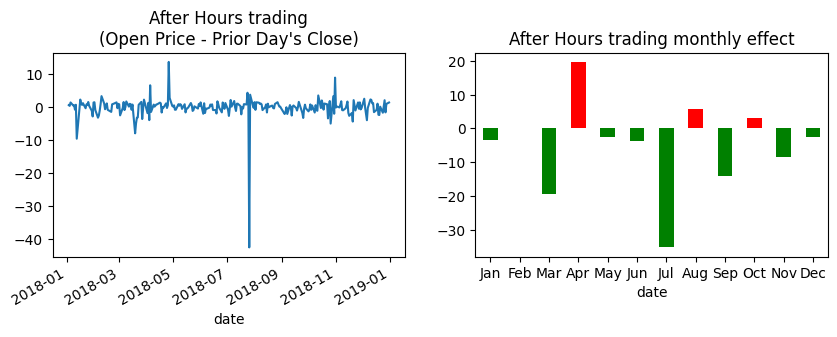

In [40]:
series = fb['open'] - fb['close'].shift(1)
monthly_effect = series.resample("1ME").sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(ax=axes[0],
            title="After Hours trading\n(Open Price - Prior Day\'s Close)")
monthly_effect.index = monthly_effect.index.strftime("%b")
monthly_effect.plot(
    ax=axes[1], kind='bar',
    title="After Hours trading monthly effect",
    color=np.where(monthly_effect > 0, 'red', 'green'),
    rot=0
)